In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('sample_data/housing.csv');
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [64]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [65]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


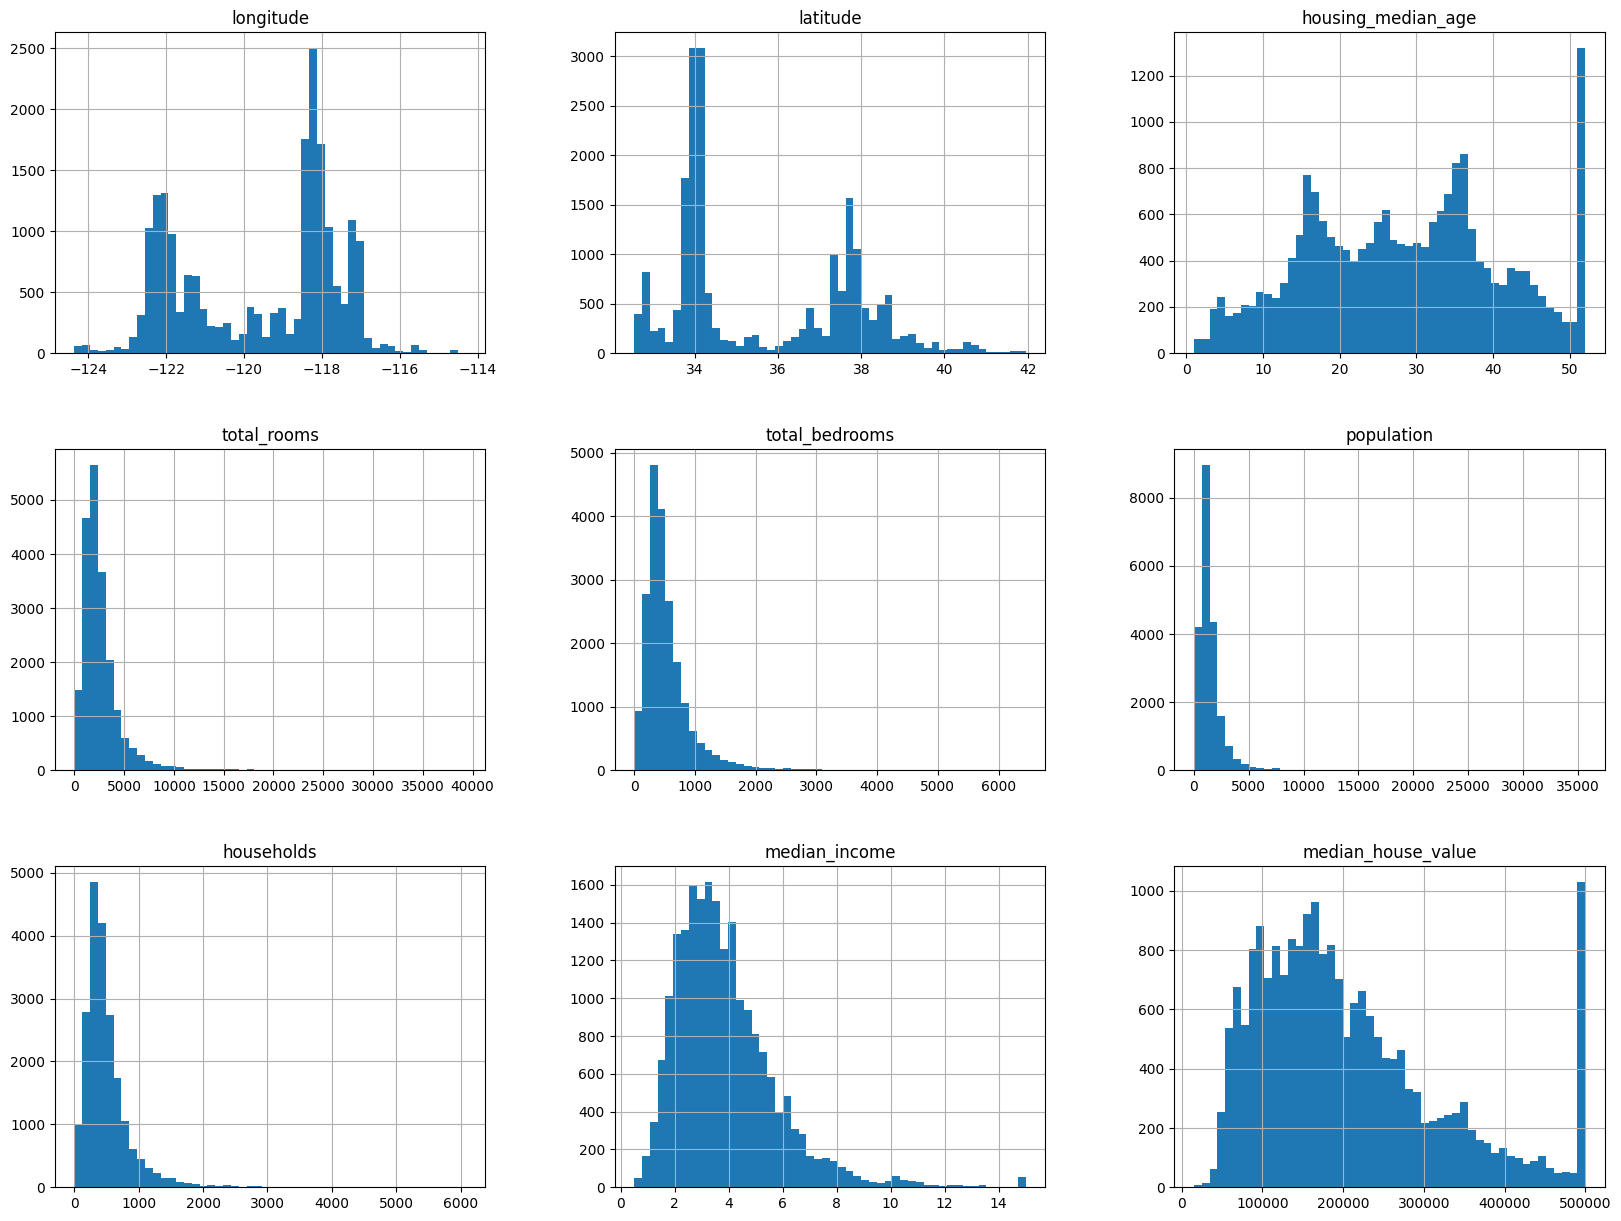

In [67]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [68]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [69]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

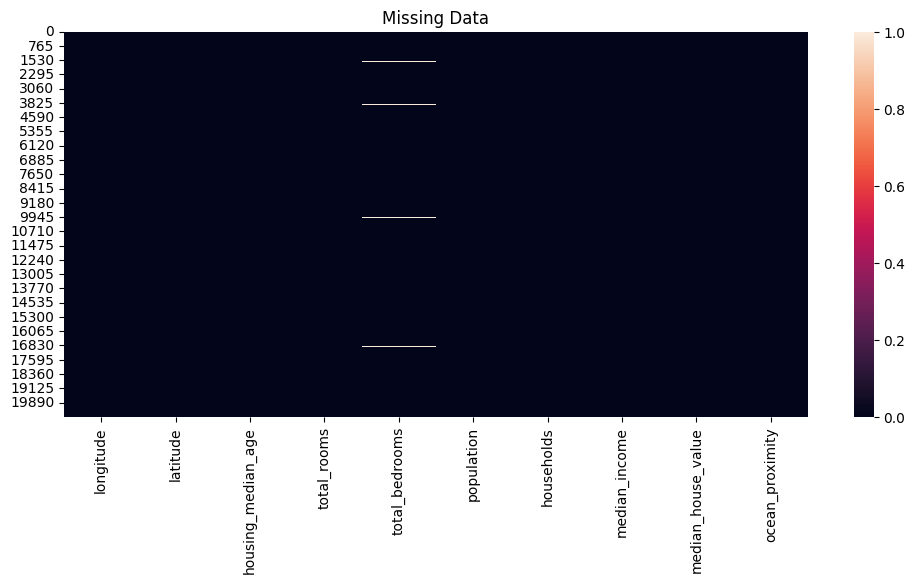

In [70]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isna());
plt.title('Missing Data')
plt.show()

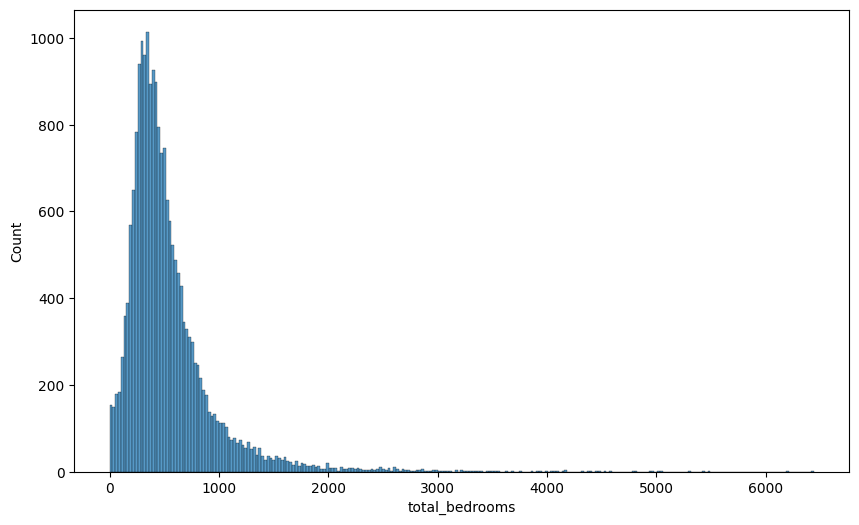

In [71]:
plt.figure(figsize= (10, 6))
sns.histplot(df['total_bedrooms']);

In [72]:
total_bedrooms_median = df["total_bedrooms"].median()
df.total_bedrooms.fillna(total_bedrooms_median, inplace=True)

In [73]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

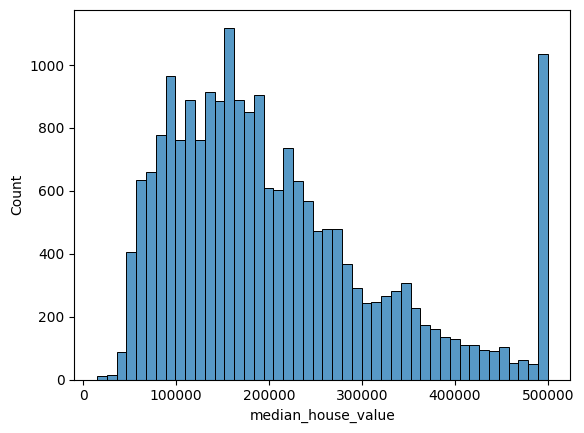

In [74]:
sns.histplot(df['median_house_value'])
plt.show()

In [75]:
house_value_q1 = df['median_house_value'].quantile(0.25)
house_value_q3 = df['median_house_value'].quantile(0.75)
house_value_iqr = house_value_q3 - house_value_q1

In [76]:
df['median_house_value'][df['median_house_value'] > house_value_q3 + (house_value_iqr * 1.5)].count()

1071

In [77]:
df = df[df['median_house_value'] < house_value_q3 + (house_value_iqr * 1.5)]
df.shape

(19569, 10)

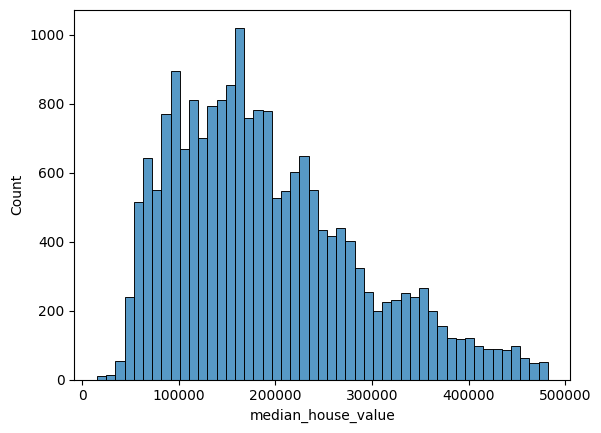

In [78]:
sns.histplot(df['median_house_value'])
plt.show()

In [79]:
df.shape

(19569, 10)

In [80]:
#households

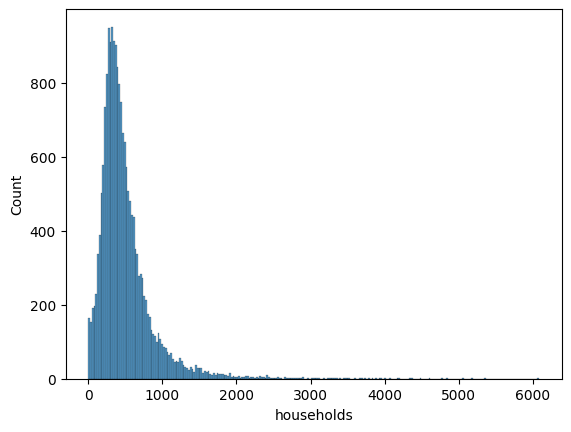

In [81]:
sns.histplot(df['households'])
plt.show()

In [82]:
households_q1 = df['households'].quantile(0.25)
households_q3 = df['households'].quantile(0.75)
households_iqr = households_q3 - households_q1

In [83]:
df['households'][df['households'] > households_q3 + households_iqr * 1.5].count()

1158

In [84]:
df = df[df['households'] < households_q3 + households_iqr * 1.5]
df.shape

(18407, 10)

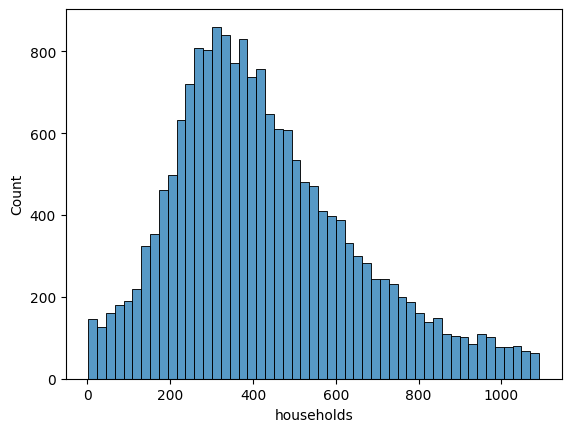

In [85]:
sns.histplot(df['households'])
plt.show()

In [86]:
#median_income

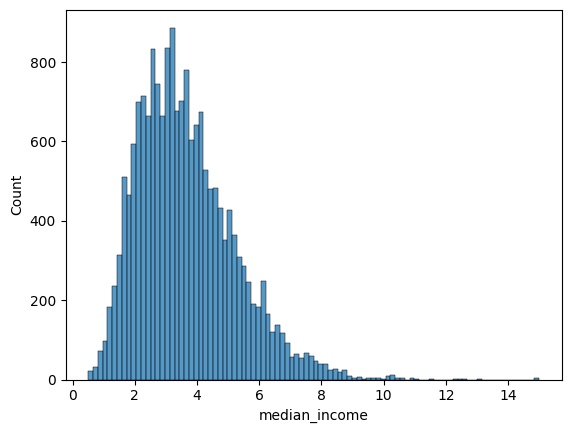

In [87]:
sns.histplot(df['median_income'])
plt.show()

In [88]:
median_income_q1 = df['median_income'].quantile(0.25)
median_income_q3 = df['median_income'].quantile(0.75)
median_income_iqr = median_income_q3 - median_income_q1

In [89]:
df['median_income'][df['median_income'] > median_income_q3 + median_income_iqr * 1.5].count()


334

In [90]:
df = df[df['median_income'] < median_income_q3 + median_income_iqr * 1.5]
df.shape

(18073, 10)

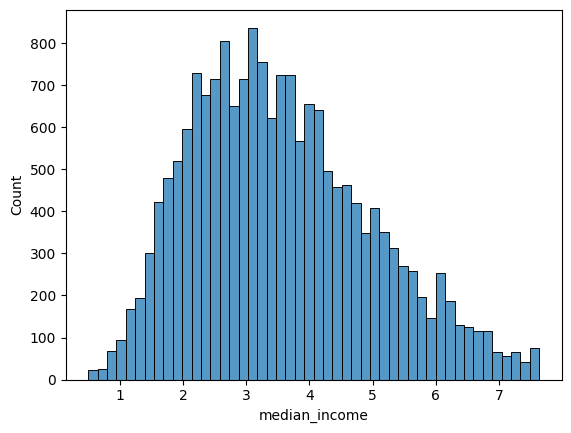

In [91]:
sns.histplot(df['median_income'])
plt.show()

In [92]:
#Encoding categorical variables¶


In [93]:
labelEncoder = LabelEncoder()
df["ocean_proximity"] = labelEncoder.fit_transform(df["ocean_proximity"])

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,18073.000000,18073.000000,18073.000000,18073.000000,18073.000000,18073.000000,18073.000000,18073.000000,18073.000000,18073.00000
mean,-119.585384,35.681159,29.219831,2237.514967,464.204504,1257.836275,431.986887,3.560242,186241.393017,1.15963
std,2.004531,2.161550,12.273863,1235.751242,244.121658,696.280694,221.014625,1.416915,92621.239490,1.40350
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.00000
25%,-121.760000,33.940000,19.000000,1391.000000,292.000000,777.000000,275.000000,2.487500,113500.000000,0.00000
50%,-118.550000,34.290000,30.000000,2016.000000,423.000000,1136.000000,395.000000,3.383900,169400.000000,1.00000
75%,-118.020000,37.740000,37.000000,2866.000000,598.000000,1616.000000,560.000000,4.476200,240700.000000,1.00000
max,-114.310000,41.950000,52.000000,12342.000000,2634.000000,8733.000000,1091.000000,7.634800,482200.000000,4.00000


In [94]:
#Scaling Numerical Features¶


In [95]:
y = df["median_house_value"]
y

2        352100.0
3        341300.0
4        342200.0
5        269700.0
6        299200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 18073, dtype: float64

In [96]:
x = df.drop(["median_house_value"] , axis = 1)


In [97]:
scaler = MinMaxScaler()

scaler.fit(x)

x_scaled = scaler.transform(x)

In [98]:
x_scaled

array([[0.21015936, 0.5642933 , 1.        , ..., 0.16069789, 0.94710508,
        0.75      ],
       [0.20916335, 0.5642933 , 1.        , ..., 0.19926538, 0.72085103,
        0.75      ],
       [0.20916335, 0.5642933 , 1.        , ..., 0.23599633, 0.46900447,
        0.75      ],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.39577594, 0.16820138,
        0.25      ],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.31864096, 0.19163548,
        0.25      ],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.48484848, 0.26471289,
        0.25      ]])

In [99]:
x_scaled = pd.DataFrame(x_scaled , columns= x.columns)


In [100]:
x_scaled.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,18073.000000,18073.000000,18073.000000,18073.000000,18073.000000,18073.000000,18073.000000,18073.000000,18073.000000
mean,0.474563,0.333811,0.553330,0.181160,0.175610,0.143738,0.394846,0.428926,0.289908
std,0.199654,0.229708,0.240664,0.100142,0.092751,0.079757,0.202952,0.198589,0.350875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.257968,0.148778,0.352941,0.112561,0.110182,0.088660,0.250689,0.278574,0.000000
50%,0.577689,0.185972,0.568627,0.163209,0.159954,0.129782,0.360882,0.404210,0.250000
75%,0.630478,0.552604,0.705882,0.232091,0.226444,0.184765,0.512397,0.557303,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
#Model Building¶


In [118]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=1)

In [119]:
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [120]:
dtReg_y_pred = dtReg.predict(X_test)
dtReg_y_pred

array([135048.14814815,  60741.17647059, 184608.81801126, ...,
       145206.22009569, 109128.        , 128028.57142857])

In [121]:
print(dtReg_y_pred[0:5])
print(y_test[0:5])

[135048.14814815  60741.17647059 184608.81801126 117855.23255814
 241524.15458937]
2218     123000.0
2090      51300.0
10917    165600.0
250      119100.0
20492    204600.0
Name: median_house_value, dtype: float64


In [122]:
dtReg_mse = mean_squared_error(y_test,dtReg_y_pred)
dtReg_rmse = np.sqrt(dtReg_mse)
dtReg_mae = mean_absolute_error(y_test , dtReg_y_pred)
dtReg_R2_score = r2_score(y_test , dtReg_y_pred)
p = len(X_train.columns)
n = len(y_train)
dtReg_adj_R2 = 1-(1-dtReg_R2_score)*(n-1)/(n-p-1)
dtReg_mape = mean_absolute_percentage_error(y_test , dtReg_y_pred)


print('Training Score_dtReg: ', dtReg.score(X_train, y_train))
print('Testing Score_dtReg: ', dtReg.score(X_test, y_test))
print('MSE_dtReg: ',dtReg_mse)
print('RMSE_dtReg: ',dtReg_rmse)
print('MAE_dtReg: ',dtReg_mae)
print('R squared of DecisionTreeRegressor :',dtReg_R2_score)
print('Adjacent R squared of DecisionTreeRegressor : ',dtReg_adj_R2)
print("Mean  absolute precentage error of DecisionTreeRegressor : ",dtReg_mape*100,'%')

Training Score_dtReg:  0.7611391570999471
Testing Score_dtReg:  0.648931198077394
MSE_dtReg:  3110434844.8812613
RMSE_dtReg:  55771.272577208256
MAE_dtReg:  38365.86071738061
R squared of DecisionTreeRegressor : 0.648931198077394
Adjacent R squared of DecisionTreeRegressor :  0.6487125090396515
Mean  absolute precentage error of DecisionTreeRegressor :  22.367924809035404 %


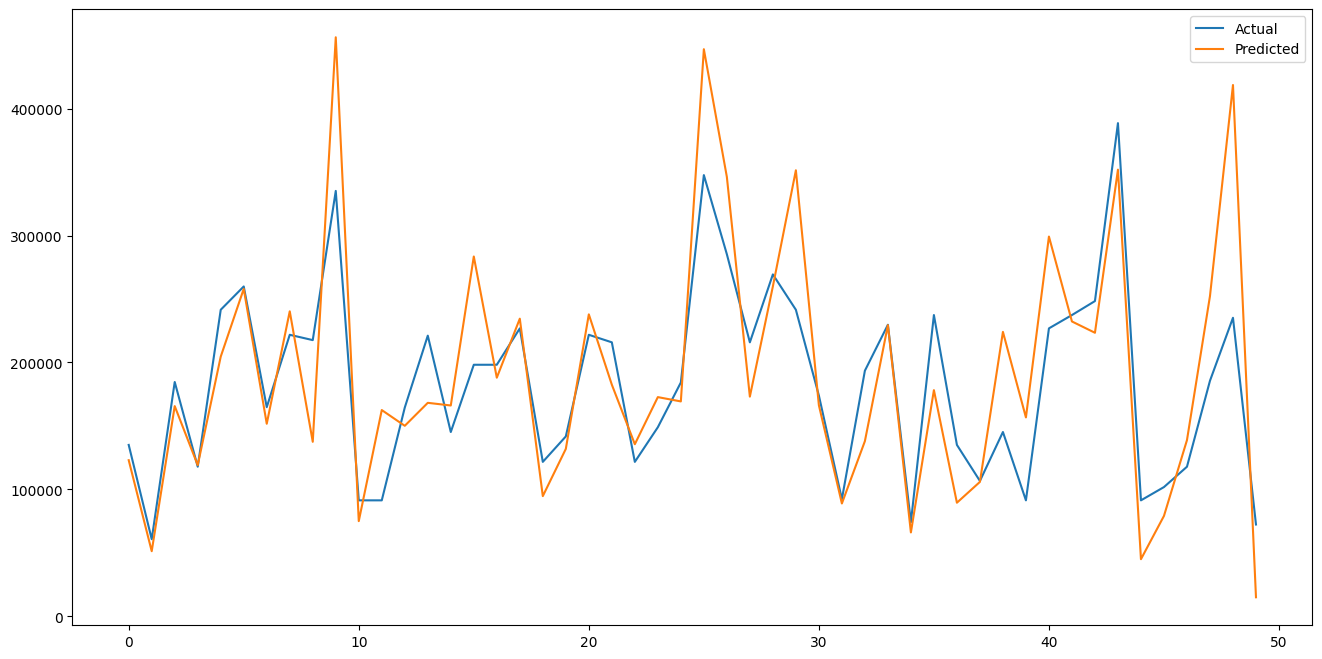

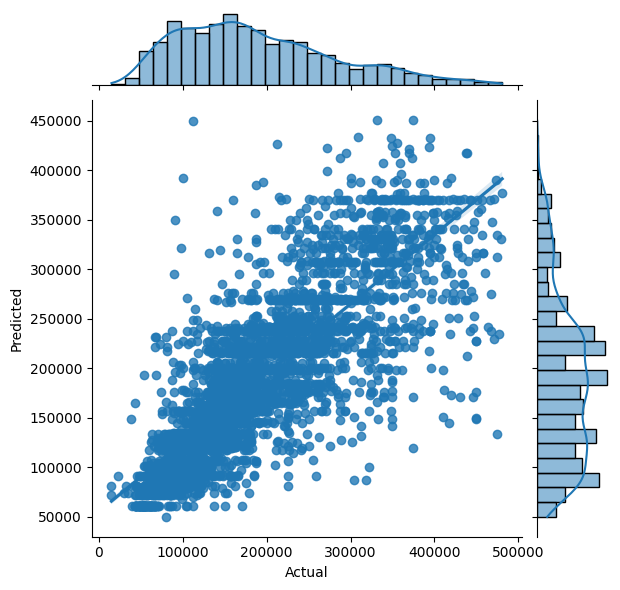

In [123]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

In [124]:
rfReg = RandomForestRegressor(30)
rfReg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

In [125]:
rfReg_y_pred = rfReg.predict(X_test)
rfReg_y_pred

array([135310.        ,  54426.66666667, 168456.66666667, ...,
       172133.33333333, 109106.66666667,  91106.66666667])

In [126]:
rfReg_mse = mean_squared_error(y_test,rfReg_y_pred)
rfReg_rmse = np.sqrt(rfReg_mse)
rfReg_mae = mean_absolute_error(y_test , rfReg_y_pred)
rfReg_R2_score = r2_score(y_test , rfReg_y_pred)
p = len(X_train.columns)
n = len(y_train)
rfReg_adj_R2 = 1-(1-rfReg_R2_score)*(n-1)/(n-p-1)
rfReg_mape = mean_absolute_percentage_error(y_test , rfReg_y_pred)


print('Training Score_rfReg: ', rfReg.score(X_train, y_train))
print('Testing Score_rfReg: ', rfReg.score(X_test, y_test))
print('MSE_rfReg: ',rfReg_mse)
print('RMSE_rfReg: ',rfReg_rmse)
print('MAE_rfReg: ',rfReg_mae)
print('R squared of RandomForestRegressor :',rfReg_R2_score)
print('Adjacent R squared of RandomForestRegressor : ',rfReg_adj_R2)
print("Mean  absolute precentage error of RandomForestRegressor : ",rfReg_mape*100,'%')

Training Score_rfReg:  0.9650243179961889
Testing Score_rfReg:  0.7693142106981651
MSE_rfReg:  2043853265.610158
RMSE_rfReg:  45208.995405894144
MAE_rfReg:  30258.13693868142
R squared of RandomForestRegressor : 0.7693142106981651
Adjacent R squared of RandomForestRegressor :  0.7691705110785834
Mean  absolute precentage error of RandomForestRegressor :  17.802422304782798 %


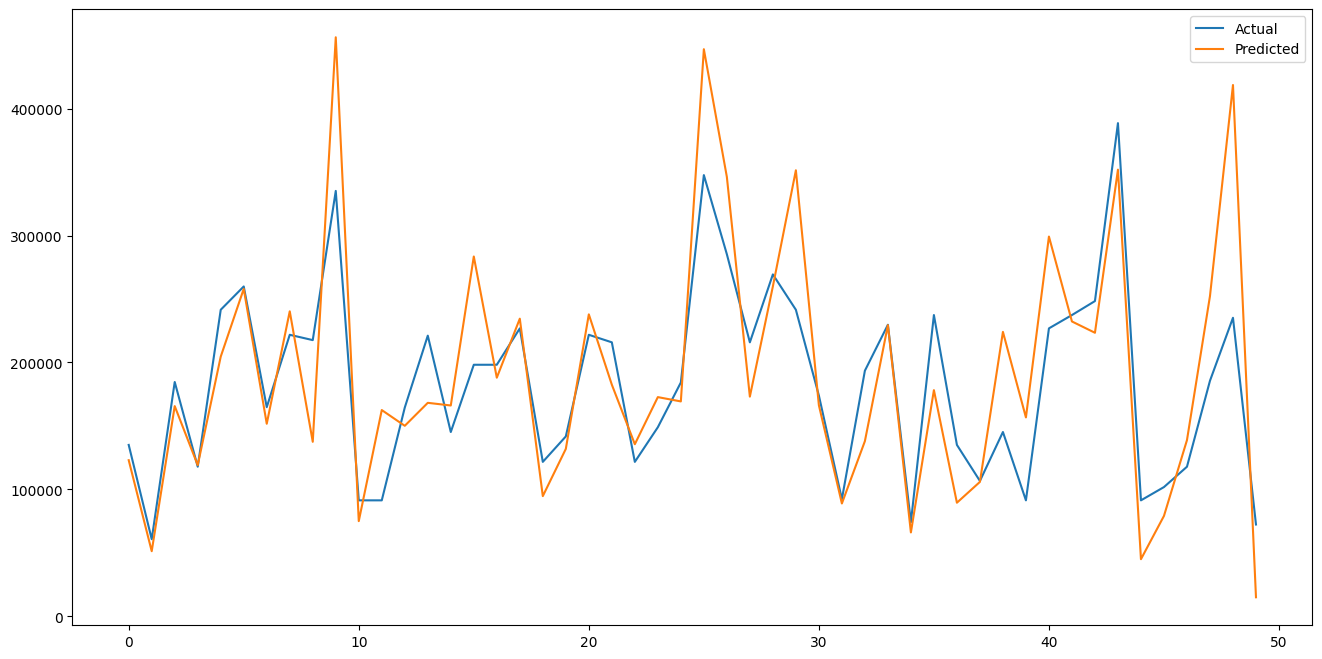

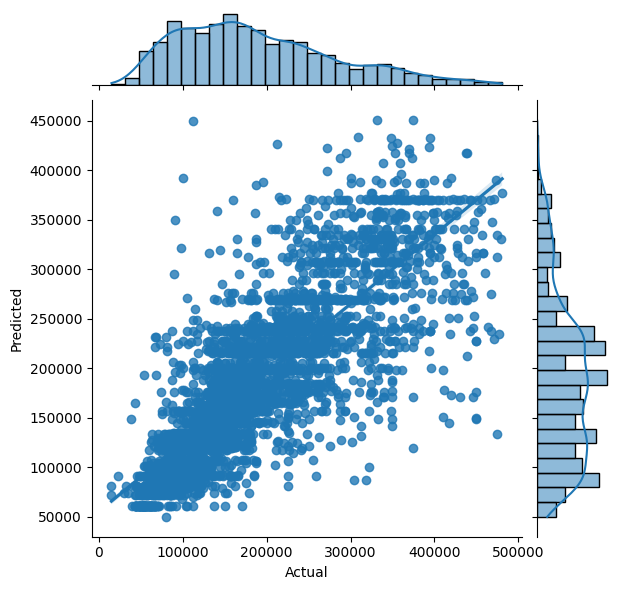

In [127]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")